<header>
        <div style="overflow: auto;">
        <img src="./images/AMS_LogoRED3.png" style="float: left;" width="300" />
        <img src="./images/TUDelft.jpg" style="float: right;" />
    </div>
    <div style="text-align: center;">
        <h1> AMS Data1 </h1>
        <h2>Workshop 4: Tabular data and plotting part 1</h2>
        <h6>&copy; 2023, TU Delft. Hans Hoogenboom, Creative Commons</h6>     
    </div>
    <br>   
    <br>
</header>

## Introduction

Last week we started with a bit of data processing. We opened a file, tried to find the correct data and then use/manipulate that data for further operations. At the start we experienced already a problem, namely the naming of files on different operating systems (OS, e.g., Linux, Mac and Windows). Windows users had to change the path to the file they wanted to open while Mac users were okay. When exchanging scripts with users of different OS's it is annoying to have to manually change filenames. Even mentioning *manually* means that there is something wrong, we are automating things after all! Luckily for us that Python comes with a library (what a suprise) that can handle this issue for us. Meet ***os.path***!

### The os.path library
The *os.path* library comes with Python so there is no need to install it (actually the library is *os* and *path* is a library module, module for short). The module has several functions that can make our lives easier when dealing with files and directories (folders). The functions in *os.path* are not changing anything about the files so they are safe to use.

#### File and filepaths
Files on your computer are categorized (hopefully) in directories. You have a directory where Windows/Mac store all the essential OS files, there is a directory for your pictures etc. Directories and their contents reside on a physical disc (M2, SSD, harddrive, USB). On Windows these are the C: and the D: drives for example. A full path to a file on Windows might read *C:\Users\Hans\Documents\AMS\WS4.ipynb*. *C:* is the drive letter, *\Users\Hans\Documents\AMS\* is the path, *WS4* is the human readable filename and *.ipynb* is the file extension (the file type). Windows often hides the extensions and uses icons to denote filetypes.

#### Absolute and relative paths
When you run a script, you run the script from somewhere, usually from the directory where it is located. This is the current working directory.

In [1]:
import os
# print the current working directory (where am I?)
print(os.getcwd())

c:\Users\julia\Git\MetData\Assignment4


If I want to access a file called *data.csv* in say */home/hans/Documents/csv* from my current location I could do that in two ways: by giving the full path */home/hans/Documents/csv/data.csv* which is also named the **absolute path** or by traversing or moving from my current working directory to the new location. Moving from */home/hans/Documents/python* to */home/hans/Documents* is moving up (moving to the left in the path string), from */home/hans/Documents* to */home/hans/Documents/python* is moving down. Moving down is as simple as just specifying the directory name. Moving up is done by using two dots, e.g. "..". So if I am in */home/hans/Documents/python* and I say go to ".." I will end up in */home/hans/Documents*. If I then want to go to the *csv* directory I type *csv*. So ../csv is the **relative path** from my current working directory to */home/hans/Documents/csv*.

If you are in the Windows command prompt or in the shell on Mac, you need to type *cd ..* to move up and *cd name* to move down. Give it a try. The *cd* stand for change directory.

Ok, enough theory and background. So what functions do *os* and *os.path* provide that are useful to us? Below you find some code with comments demonstrating functions from the libraries.

In [5]:
import os
# print the current working directory (where am I?)
cwd = os.getcwd()
# list all contents from the current directory
os.listdir('.')
# and from the directory above
os.listdir('..')
# make a new directory in the current directory
# if you run the code twice you get an error
if os.path.exists("my_new_and_silly_dir"):
    print("Directory already exists")
else:
    os.mkdir("my_new_and_silly_dir")

import os.path
# print the absolute path
print(os.path.abspath('.'))
print(os.path.abspath(".."))
print(os.path.abspath("../.."))
# print the name of the current directory
print(os.path.basename(cwd))
# print the path where the current directory or file is located
print(os.path.dirname(cwd))

fake_dir = "answers_to_everything"
# you can join paths like this. Python adds extra \ or /!
new_path = os.path.join(cwd, fake_dir)
print(new_path)
# does a path exist?
if os.path.exists(new_path):
    print("Path exists")
else:
    os.mkdir(new_path)
# now it does!
print(os.path.exists(new_path))
# are we dealing with a file?
print(os.path.isfile(new_path))
current_file = os.path.join(os.getcwd(), "WS4.ipynb")
print(os.path.isfile(current_file))
# get the size of a file
print(os.path.getsize(current_file), "bytes")

Directory already exists
c:\Users\julia\Git\MetData\Assignment4
c:\Users\julia\Git\MetData
c:\Users\julia\Git
Assignment4
c:\Users\julia\Git\MetData
c:\Users\julia\Git\MetData\Assignment4\answers_to_everything
Path exists
True
False
True
18553 bytes


Hopefully you have now some functions which can make your life easier when dealing with files on both Windows and Mac. 

### individual exercise 1:
Rewrite the above script so you can run it repeatedly.

## Pandas
Pandas were mentioned during the previous lecture and workshop. Unfortunately they are not cute furry animals in the Python world (nor food for Pythons) but a library for data analysis and manipulation. [This is a link to the website](https://pandas.pydata.org/). You can install Pandas when you go to your shell (command line) and issue the following command: *py -m pip install pandas*. While your at it, also install [Plotly](https://plotly.com/python/), *py -m pip install plotly* and Matplotlib: *py -m pip install matplotlib*. When you install the libraries, probably a whole bunch of other libraries will get installed as well. If everything installed correctly the code below should return the version numbers of the installed libraries:

In [1]:
import pandas as pd
import plotly as pl
print(pd.__version__, '\n', pl.__version__, sep='')

2.1.1
5.17.0


Pandas can best be compared to Excel. Just as Excel it uses a table, in Pandas a **dataframe**, of rows and columns. A column is called a **series** and can only have one specific datatype (only float or only string etc.). In that sense it is a little more strict then Excel.

If you read through the Pandas documentation you will often see a reference to ndarrays or to Numpy. Ndarrays are n-dimensional arrays (lists) of data and are a data structure from the Numpy library. In a next workshop I will dive in to that library, just to get you familiar with how it works. Something you will appreciate about Pandas is that it can read a lot of different data files by default, have a look at [this list](https://pandas.pydata.org/docs/user_guide/io.html).

You can create your own dataframe with the following function using the *DataFrame* method (take note of the capitals):

In [2]:
df = pd.DataFrame([['AMS', 'Amsterdam', 'Schiphol'], ['LHR', 'London', 'London Heathrow Airport']])
print(df)

     0          1                        2
0  AMS  Amsterdam                 Schiphol
1  LHR     London  London Heathrow Airport


We can add some human readable names to the rows (indices) and columns by directly assigning a list with names.

In [3]:
columns=['IATA', 'City', 'Airport']
df.columns = columns
# or directly assign
df.index = ['a', 'l']
print(df)

  IATA       City                  Airport
a  AMS  Amsterdam                 Schiphol
l  LHR     London  London Heathrow Airport


Getting the data from a colum is pretty much the same as when working with Python dictionaries:

In [4]:
df['IATA']

a    AMS
l    LHR
Name: IATA, dtype: object

But getting data from an index row is a bit different. We need to use the function *loc* here:

In [5]:
df.loc['a']

IATA             AMS
City       Amsterdam
Airport     Schiphol
Name: a, dtype: object

With the *iloc* function you query by a number, so the 1st row:

In [6]:
df.iloc[0]

IATA             AMS
City       Amsterdam
Airport     Schiphol
Name: a, dtype: object

See here for more indexing operations: [Indexing and selecting data](https://pandas.pydata.org/docs/user_guide/indexing.html)

Another example of creating a dataframe, this time with numbers. We initialize the dataframe by a list of numbers. Each row is a seperate list of numbers, all rows are enclosed in square brackets again. That is why you see the \[\[ at the start and \]\] at the end. We can also set the column and row headers directly. You see that the first row of integers gets promoted to floats. A series (column) can have only one data type!

In [7]:
nf = pd.DataFrame([[0, 1, 2], [2.0, 3.0, 4.0], [3.0, 4.0, 5.0]], columns=['2021', '2022', '2023'], index=['area1', 'area2', 'area3'])
nf

,2021,2022,2023
area1,0.0,1.0,2.0
area2,2.0,3.0,4.0
area3,3.0,4.0,5.0


You can create a single column, a series, using the *Series* function. We can give the series a name and insert it into our datafame using the *insert* method:

In [10]:
ns = pd.Series([3.0, 5.0, 6], name='boring', index=['area5', 'area6', 'area7'])
print(ns)
nf.insert(2, 'test', ns)
nf

area5    3.0
area6    5.0
area7    6.0
Name: boring, dtype: float64


,2021,2022,test,leap,2023
area1,0.0,1.0,NaN,3.0,2.0
area2,2.0,3.0,NaN,5.0,4.0
area3,3.0,4.0,NaN,6.0,5.0


### individual exercise 2:
1) What happens if you execute the code in the above cell a second time?
2) Change the *insert* statement so that we can insert a new column, do not execute yet! What happens if you change the names of the indices, or remove the *index = ...* altogether, of the **ns** series and you try to insert ns again? Now you can execute the code!

You can set change the values of a cell using the *at* or *iat* function

In [13]:
# use a name based approach
nf.at['area1', '2022'] = 12.1
print(nf, '\n')
# or change by index. Do you see a pattern in the 
# naming of the functions loc, iloc, at and iat?
print("Cell at position 1,1:", nf.iat[1, 1])

#print the names of the axes...the index and column names
print(nf.axes)

# find the maximum value of a column
print("Max value in column 2023:", nf['2023'].max())

# find ALL the maximum values in the columns
print("\nColumns:\n", nf.max(axis=0), sep='')
# and in the rows
print("Rows:\n", nf.max(axis=1), sep='')
# get a single row
sf = nf.loc['area2']
print("\nContents of sf:\n", sf, sep='')

       2021  2022  test  leap  2023
area1   0.0  12.1   NaN   3.0   2.0
area2   2.0   3.0   NaN   5.0   4.0
area3   3.0   4.0   NaN   6.0   5.0 

Cell at position 1,1: 3.0
[Index(['area1', 'area2', 'area3'], dtype='object'), Index(['2021', '2022', 'test', 'leap', '2023'], dtype='object')]
Max value in column 2023: 5.0

Columns:
2021     3.0
2022    12.1
test     NaN
leap     6.0
2023     5.0
dtype: float64
Rows:
area1    12.1
area2     5.0
area3     6.0
dtype: float64

Contents of sf:
2021    2.0
2022    3.0
test    NaN
leap    5.0
2023    4.0
Name: area2, dtype: float64


What does the *sep* in the print statement do? Change the value and see what happens.

So far we only got a single row or a single value out of our dataframe. How can you select multiple columns and rows at once? One method is by specifying the column names you want to have as a list:

In [14]:
new_frame = nf[['2022', 'leap']]
print(new_frame)

       2022  leap
area1  12.1   3.0
area2   3.0   5.0
area3   4.0   6.0


Or we can use the iloc function in combination with slicing. Slicing is a bit similar to a range (well actually it is a range) where we have a start, an end (up to, remember!) and a step. The iloc works on a two dimensional structure, the first part is for rows (indices), the second part for columns:

In [15]:
# slice by columns only
col_b = nf.columns.get_loc('2022')
col_e = nf.columns.get_loc('leap')
new_frame = nf.iloc[: , col_b : col_e]
print(new_frame)

# also slice some rows
new_frame = nf.iloc[1:3 , col_b : col_e + 1]
print(new_frame)

       2022  test
area1  12.1   NaN
area2   3.0   NaN
area3   4.0   NaN
       2022  test  leap
area2   3.0   NaN   5.0
area3   4.0   NaN   6.0


These are some of the basic operations of Pandas. There are many more functions to actually do something with the data like finding the [median](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html). If you search on Google or use ChatGPT you will find some more examples and methods.

## Plotting
There are many plotting libraries for Python. One of the most well known is [Matplotlib](https://matplotlib.org/). For statistics two nice libraries are [Seaborn](https://seaborn.pydata.org/index.html) and Plotly. For this workshop we will make use of Plotly. Pandas uses Matplotlib by default. You can install Matplotlib with the usual command: *py -m pip install matplotlib*

<Axes: ylabel='Frequency'>

<Figure size 640x480 with 0 Axes>

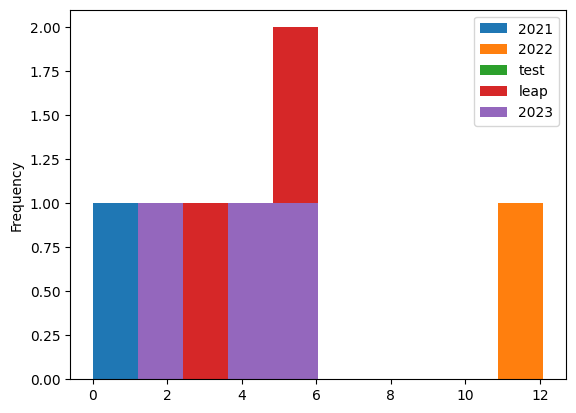

In [16]:
# plot internal
import matplotlib.pyplot as plt
plt.figure()
nf.plot.hist()

If we want to use another library for plotting we have to tell Pandas so:

In [17]:
# change default plotting library
pd.options.plotting.backend = "plotly"
fig = nf.plot()
fig.show()

Explore the Plotly website for some basic tutorial on the usage. You can get started [here](https://plotly.com/python/figure-structure/) and [here](https://plotly.com/python/creating-and-updating-figures/).

### Group exercise
On Brightspace you can find under Contents/Resources a long list of datasets. Under the [AirBnB](https://brightspace.wur.nl/d2l/le/content/240321/viewContent/1052192/View) heading you can find a link to a website where you can download the AirBnB data from Amsterdam. Find the average price and the median for the Westerpark neighborhood. Plot the median distribution using Plotly.

## Some useful links
[Pandas 10 min tutorial](https://pandas.pydata.org/docs/user_guide/10min.html)
<br>[Pandas cookbook](https://pandas.pydata.org/docs/user_guide/cookbook.html)
<br>[Plotly statistical charts](https://plotly.com/python/statistical-charts/)
<br>[Numpy](https://numpy.org/)
<br>[Numpy quickstart](https://numpy.org/devdocs/user/quickstart.html)

### THE END
###### Hans Hoogenboom, Sept. 2023